In [1]:
import pandas as pd


In [2]:
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [4]:
df=pd.read_csv("CarPrice_Assignment.csv")

In [5]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
X=df[['enginesize','horsepower','citympg','highwaympg']]
Y=df['price']

In [7]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [8]:
scaler= StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [9]:
model=LinearRegression()

In [10]:
model.fit(X_train_scaled,Y_train)

LinearRegression()

In [11]:
Y_pred=model.predict(X_test_scaled)

In [12]:
Y_pred

array([27418.510946  , 17744.01727528, 11619.7668376 , 13427.78029746,
       21246.07117512,  7221.00179657,  6409.76448912,  7948.72247057,
       10657.11736998,  4974.38717748, 15746.26636518,  7884.84942498,
       16235.43814833, 11887.27178778, 39493.79631613,  6237.45954826,
        -760.25551207, 19467.15957224, 11846.04006806, 10465.99758559,
       11613.18921158, 22948.03201228,  7221.00179657,  2882.81909589,
        6266.69252843, 27418.510946  , 16038.05610161, 15711.34937893,
        7221.00179657, 15711.34937893, 21246.07117512,  6266.69252843,
        7256.43216346, 21099.57713416, 10065.02409529, 21246.07117512,
       11693.63958948,  8221.34582688,  5267.83642073, 19467.15957224,
        9831.31806174])

In [13]:
print('Name: ')

Name: 


In [14]:
print('Name:Lakshiya Rajkmar ')
print('Reg. No:212225240076 ')
print("MODEL COEFICIENTS:")
for feature,coef in zip(X.columns,model.coef_):
    print(f"{feature:>12}: {coef:>10.2f}")
print(f"{'Intercept':>12}: {model.intercept_:>10.2f}")

Name:Lakshiya Rajkmar 
Reg. No:212225240076 
MODEL COEFICIENTS:
  enginesize:    4523.40
  horsepower:    1694.22
     citympg:    -392.57
  highwaympg:    -816.36
   Intercept:   13223.41


In [15]:
print("\nMODEL PERFORMANCE:")
print(f"{'MSE':>12}: {mean_squared_error(Y_test,Y_pred):>10.2f}")
print(f"{'MAE':>12}: {mean_absolute_error(Y_test,Y_pred):>10.2f}")
print(f"{'RMSE':>12}: {np.sqrt(mean_squared_error(Y_test,Y_pred)):>10.2f}")
print(f"{'R-squared':>12}: {r2_score(Y_test,Y_pred):>10.2f}")


MODEL PERFORMANCE:
         MSE: 16471505.90
         MAE:    2892.63
        RMSE:    4058.51
   R-squared:       0.79


<function matplotlib.pyplot.show(close=None, block=None)>

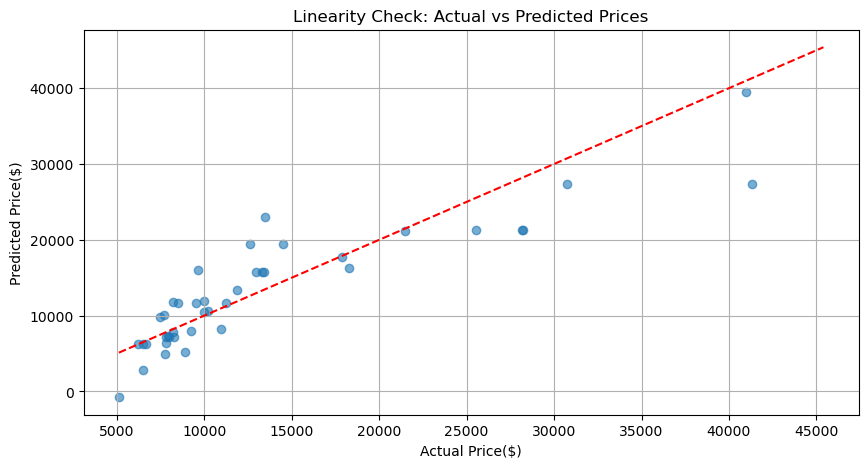

In [17]:
plt.figure(figsize=(10,5))
plt.scatter(Y_test,Y_pred,alpha=0.6)
plt.plot([Y.min(),Y.max()],[Y.min(),Y.max()],'r--')
plt.title("Linearity Check: Actual vs Predicted Prices")
plt.xlabel("Actual Price($)")
plt.ylabel("Predicted Price($)")
plt.grid(True)
plt.show

In [19]:
residuals=Y_test - Y_pred
dw_test=sm.stats.durbin_watson(residuals)
print(f"\nDurbin-Watson Statistic: {dw_test:.2f}","\n(Values close to 2 indicates no autocorrelation)")


Durbin-Watson Statistic: 2.28 
(Values close to 2 indicates no autocorrelation)


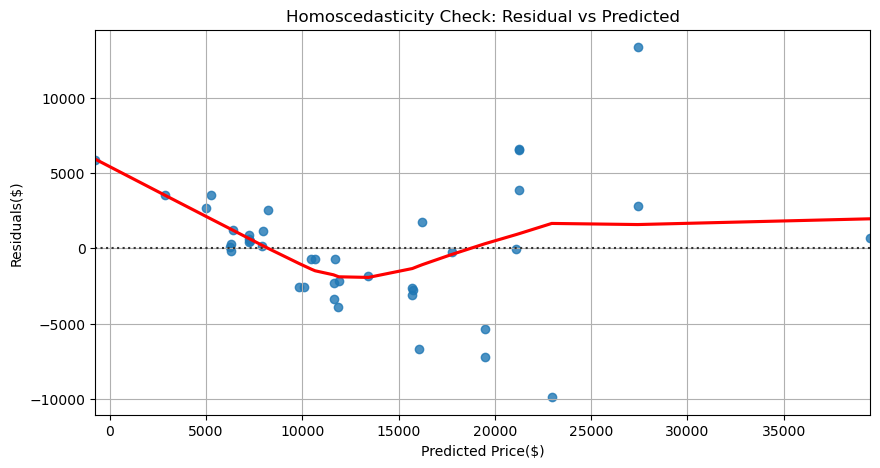

In [21]:
plt.figure(figsize=(10,5))
sns.residplot(x=Y_pred,y=residuals,lowess=True,line_kws={'color':'red'})
plt.title("Homoscedasticity Check: Residual vs Predicted")
plt.xlabel("Predicted Price($)")
plt.ylabel("Residuals($)")
plt.grid(True)
plt.show()

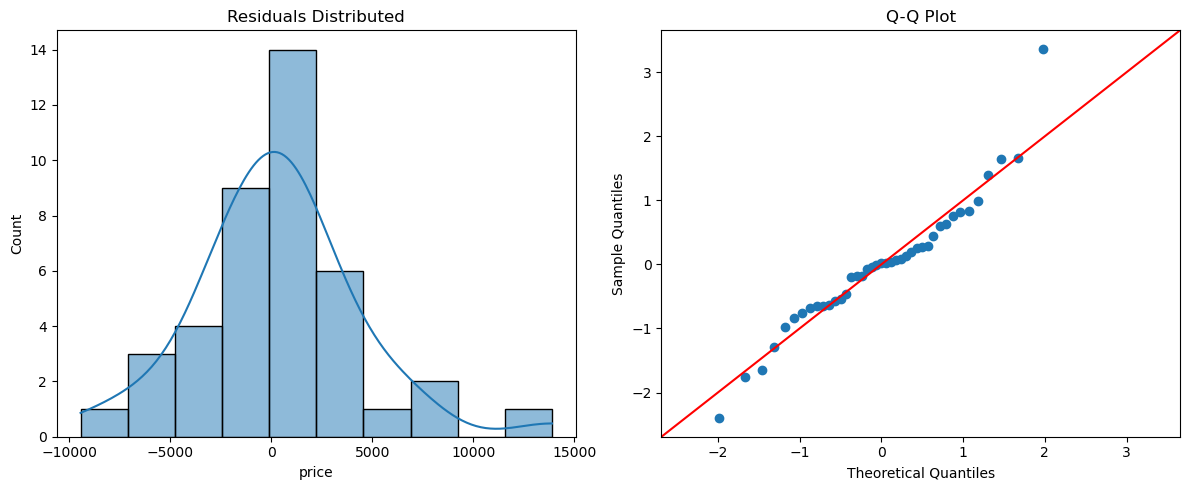

In [22]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
sns.histplot(residuals,kde=True,ax=ax1)
ax1.set_title("Residuals Distributed")
sm.qqplot(residuals,line='45',fit=True,ax=ax2)
ax2.set_title("Q-Q Plot")
plt.tight_layout()
plt.show()